In [1]:
#Import API
from dora.api import DataExplorer

import pandas as pd
from datetime import date, timedelta
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from uszipcode import ZipcodeSearchEngine

explorer = DataExplorer()

In [9]:
def plot3d(X,y_pred, centers, x,y,z,points):
    fig = pyplot.figure()
    ax = Axes3D(fig)
    colors = ['green','red','blue','black','salmon','indigo','plum','seagreen','grey','yellow']
    centers=centers
    center_colors=colors[:len(centers)]
    ax.scatter(centers[:, x], centers[:, y],centers[:,x],c=center_colors)
    for i in range(points):
        ax.scatter(X[i][x], X[i][y],X[i][z], c=colors[y_pred[i]])
    return fig

In [53]:
def custPerCluster(clusters):
    fig=plt.figure()
    maxn=clusters['y_pred'].max()
    plt.hist(clusters['y_pred'].values)
    plt.xlabel('Clusters')
    plt.ylabel('# of Customers')
    plt.xticks(range(0,maxn+1))
    plt.title('Number of Customers per Cluster')
    return fig

In [217]:
def clusterDist(clusters):
    maxn=clusters['y_pred'].max()
    clusterStats=pd.DataFrame()
    for i in range(maxn+1):
        mask=(clusters['y_pred']==i)
        t=clusters.loc[mask]
        clusterStats.loc[i,'avgNumOrders']=t['numorders'].mean()
        clusterStats.loc[i,'avgTotalSpent']=t['totalspent'].mean()
        clusterStats.loc[i,'numHouseholds']=t['householdid'].nunique()
        clusterStats.loc[i,'numZipcoes']=t['zipcode'].nunique()
        tr=t.groupby('gender').gender.count()
    return clusterStats

In [268]:
def clusterZips(clusters):
    maxn=clusters['y_pred'].max()
    zipstates={}
    zipcities={}
    for i in range(maxn+1):
        #print ("Cluster "+str(i))
        states=set()
        cities=set()
        mask=(clusters['y_pred']==i)
        t=clusters[['zipcode','y_pred']].loc[mask]
        zipcodes=t['zipcode'].unique()
        for j in range(len(zipcodes)):
            city=search.by_zipcode(str(zipcodes[j]))
            cities.add(city['City'])
            states.add(city['State'])
        zipstates.update({i:states})
        zipcities.update({i:cities})
    return zipstates, zipcities

Use the API to get 10 clusters of customers. Bad zipcodes have been removed from the dataset. Customers with no gender assigned are within the dataset of customers to be clusered.

In [22]:
#Get 10 clusters and print out the head of the dataframe
cCluster=explorer.customers.clusterCustomers(n_clusters=10)
cCluster[1].head()

/Users/laurawilke/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


,numorders,gender,zipcode,totalspent,householdid,y_pred
0,412,0,10036,606.25,19885296.0,5
1,189,1,10036,651.59,19885296.0,8
2,99,0,10036,0,49927024.0,8
3,99,2,10036,2226.32,19885296.0,8
4,70,0,10036,0,49927024.0,8


In [23]:
#clustersScaleed are the scaled values for clustering. clusters are the actual data values. 
#centers are the clustering centers
clustersScaled=cCluster[0]
clusters=cCluster[1]
centers=cCluster[2]

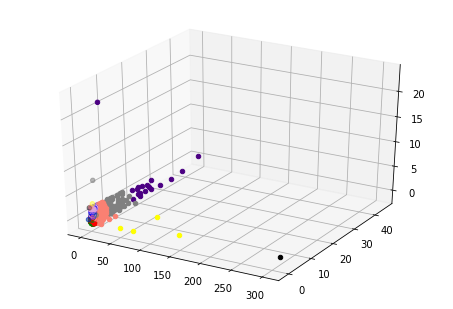

In [16]:
#3-D Plot of the customer clusters (numOrders, zipcode, gender)
plot=plot3d(clustersScaled[['gender','totalspent','zipcode','numorders']].values,clustersScaled['y_pred'].values,centers, 3,1,2,2500)
plot

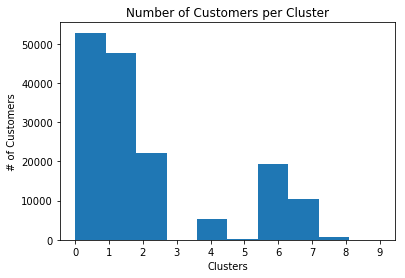

In [15]:
#Histogram of the number of customers in each cluster
dist=custPerCluster(clusters)
dist

In [218]:
#Stats by cluster
stats=clusterDist(clusters)
stats

,avgNumOrders,avgTotalSpent,numHouseholds,numZipcoes
0,1.156602,63.472744,22233.0,4442.0
1,1.162069,58.387951,10451.0,3254.0
2,1.171302,53.893328,52787.0,6213.0
3,1.147301,51.281134,47436.0,5762.0
4,1.133732,58.264633,19192.0,3791.0
5,412.000000,606.250000,1.0,1.0
6,2.048058,628.098751,4985.0,2205.0
7,2.949367,5375.113544,79.0,74.0
8,114.250000,719.477500,2.0,1.0
9,1.973829,1888.280592,726.0,514.0


In [244]:
#Get the states and cities that are clustered together
zipdata=clusterZips(clusters)
zipstates=zipdata[0]
zipcities=zipdata[1]